# VAE performances

* Similarity evaluation
* Statistical evaluation
* Physical evaluation

In [1]:
# imports
import altair as alt
from traffic.core import Traffic
from traffic.core.projection import EuroPP
from deep_traffic_generation.core.utils import extract_features

import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
t_gen = Traffic.from_file("./outputs/vae_gen.csv")
t_gen

,count
flight_id,
0,200
63,200
73,200
72,200
71,200
70,200
69,200
68,200
67,200


In [3]:
t_gen_dp = Traffic.from_file("./outputs/dp_vae_gen.csv")
t_gen_dp

,count
flight_id,
27,14
75,12
42,11
41,11
72,11
94,10
76,10
23,10
48,10


In [4]:
t_sim = Traffic.from_file("./outputs/vae_sim.csv")
t_sim

,count
flight_id,
27.0,90
76.0,57
24.0,54
1.0,54
26.0,54
3.0,53
81.0,53
25.0,52
87.0,52


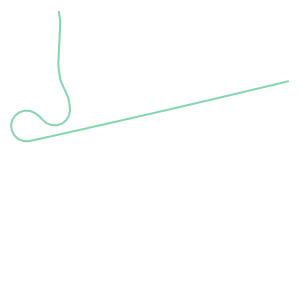

In [5]:
t_sim[27]

In [6]:
# Remove noisy trajectory
t_sim = t_sim.query("flight_id != 27")
t_gen = t_gen.query("flight_id != 27")
t_gen_dp = t_gen_dp.query("flight_id != 27")

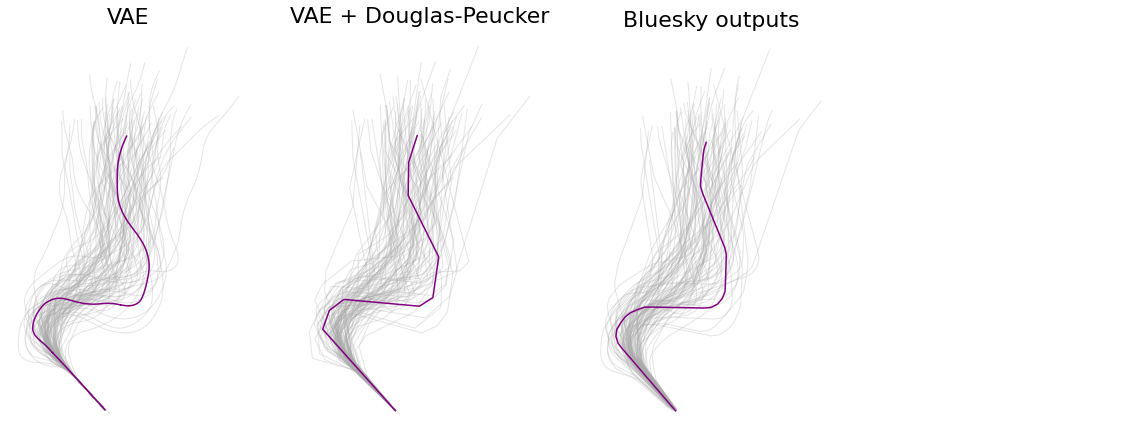

In [30]:
a = 0.3
highlight = 3

with plt.style.context("traffic"):
    fig, ax = plt.subplots(1, 4, subplot_kw=dict(projection=EuroPP()), figsize=(20,20))
    ax[0].set_title("VAE")
    t_gen.query(f"flight_id != {highlight}").plot(ax[0], alpha=a)
    t_gen[highlight].plot(ax[0], c="purple")
    ax[1].set_title("VAE + Douglas-Peucker")
    t_gen_dp.query(f"flight_id != {highlight}").plot(ax[1], alpha=a)
    t_gen_dp[highlight].plot(ax[1], c="purple")
    ax[2].set_title("Bluesky outputs")
    t_sim.query(f"flight_id != {highlight}").plot(ax[2], alpha=a)
    t_sim[highlight].plot(ax[2], c="purple")
    plt.show()

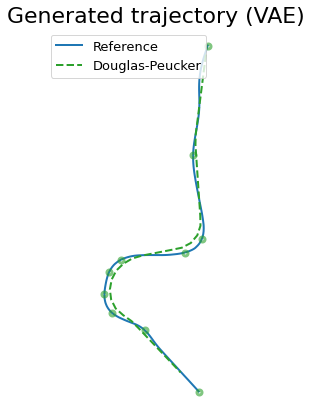

In [29]:
highlight = 10

with plt.style.context("traffic"):
    ax = plt.axes(projection=EuroPP())
    ax.set_title("Generated trajectory (VAE)")
    t_gen[highlight].plot(ax, c="tab:blue", lw=2.0, label="Reference")
    # TODO: add navpoints and reconstruction from them
    t_gen_dp[highlight].plot(ax, mec="tab:green",mew=3.0,ms=10.0, mfc="none", marker=".", ls="", alpha=0.6)
    t_sim[highlight].plot(ax, c="tab:green", ls="--", lw=2.0, label="Douglas-Peucker")
    ax.legend(loc=0)

### Similarity Evaluation

In [9]:
"""
from tslearn.metrics import dtw

gen_idx = 0

best_idx = None
best_distance = None

for i in range(len(X_ref)):
    distance = dtw(X_gen[gen_idx], X_ref[i])
    if best_distance is None:
        best_idx = i
        best_distance = distance
    elif best_distance > distance:
        best_distance = distance
        best_idx = i

best_distance
"""

'\nfrom tslearn.metrics import dtw\n\ngen_idx = 0\n\nbest_idx = None\nbest_distance = None\n\nfor i in range(len(X_ref)):\n    distance = dtw(X_gen[gen_idx], X_ref[i])\n    if best_distance is None:\n        best_idx = i\n        best_distance = distance\n    elif best_distance > distance:\n        best_distance = distance\n        best_idx = i\n\nbest_distance\n'

In [10]:
# t_gen[gen_idx]

In [11]:
# t_ref[best_idx]